<a href="https://colab.research.google.com/github/garnieroeliari/topic_modeling_fr/blob/main/notebook/GPU_que_faire_rendre_fiscalite_juste_et_efficace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic modelling vizualization**

Reponse à la question : "**Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?"**

Tuto from [here](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/). 

In [ ]:
# Libraries
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

In [ ]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#stop_words = stopwords.words('english')
stop_words = stopwords.words('french')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
#import dataset
!ls "/content/drive/MyDrive/data_nlp_side_project/topic_data"

' description2.csv'
' description3.csv'
' description.csv'
 dina_description3.csv
 dina_LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES.csv
 dina_npr.csv
 dina_nyt-articles-2020.csv
 dina_summer-products-with-rating-and-performance_2020-08.csv
 dina_train.csv
 dina_voted-kaggle-dataset.csv
' res_description.csv'


In [ ]:
#npr = pd.read_csv('../input/npr-data/npr.csv')
#df = pd.read_csv('/content/drive/MyDrive/data_nlp_side_project/topic_data/dina_description3.csv',sep='\t',engine='python')
df = pd.read_csv('/content/drive/MyDrive/data_nlp_side_project/topic_data/dina_LA_FISCALITE_ET_LES_DEPENSES_PUBLIQUES.csv',engine='python')



In [ ]:
df.head()

id  ... QUXVlc3Rpb246MTY3 - Y a-t-il d'autres points sur les impôts et les dépenses sur lesquels vous souhaiteriez vous exprimer ?
0  UHJvcG9zYWw6YTY1MmU0YTMtMWUyMC0xMWU5LTk0ZDItZm...  ...                                                NaN                                                                        
1  UHJvcG9zYWw6ZGNhY2VhYmYtMWUyMC0xMWU5LTk0ZDItZm...  ...  Améliorer le pouvoir d’achat en augmentant les...                                                                        
2  UHJvcG9zYWw6MDhhMWNkOTQtMWUyMS0xMWU5LTk0ZDItZm...  ...                                                NaN                                                                        
3  UHJvcG9zYWw6NGZlNTVlMDMtMWUyMS0xMWU5LTk0ZDItZm...  ...                                                NaN                                                                        
4  UHJvcG9zYWw6NmQ3MmU3ZDMtMWUyMS0xMWU5LTk0ZDItZm...  ...                                                NaN                                                                        

[5 rows x 19 columns]

In [ ]:
df.shape

(186711, 19)

In [ ]:
for col in df.columns: 
    print(col) 

id
reference
title
createdAt
publishedAt
updatedAt
trashed
trashedStatus
authorId
authorType
authorZipCode
QUXVlc3Rpb246MTYy - Quelles sont toutes les choses qui pourraient être faites pour améliorer l'information des citoyens sur l'utilisation des impôts ?
QUXVlc3Rpb246MTYz - Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?
QUXVlc3Rpb246MTY0 - Quels sont selon vous les impôts qu'il faut baisser en priorité ?
QUXVlc3Rpb246MjA2 - Afin de financer les dépenses sociales, faut-il selon vous...
QUXVlc3Rpb246MjA1 - S'il faut selon vous revoir les conditions d'attribution de certaines aides sociales, lesquelles doivent être concernées ?
QUXVlc3Rpb246MTY1 - Quels sont les domaines prioritaires où notre protection sociale doit être renforcée ?
QUXVlc3Rpb246MTY2 - Pour quelle(s) politique(s) publique(s) ou pour quels domaines d'action publique, seriez-vous prêts à payer plus d'impôts ?
QUXVlc3Rpb246MTY3 - Y a-t-il d'autres points sur les impôts et les dépenses sur les

In [ ]:
justice_fiscale=df["QUXVlc3Rpb246MTYz - Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?"]

In [ ]:
justice_fiscale.head()

0                                                  NaN
1                                                  NaN
2                                                  NaN
3    Repartir les richesses.  suppression de la tax...
4    Les droits soient automatiques, comme nos devo...
Name: QUXVlc3Rpb246MTYz - Que faudrait-il faire pour rendre la fiscalité plus juste et plus efficace ?, dtype: object

In [ ]:
justice_fiscale.shape

(186711,)

In [ ]:
df_justice_fiscale=justice_fiscale

In [ ]:
df_justice_fiscale.shape

(186711,)

In [ ]:
new_df_justice_fiscale=df_justice_fiscale.dropna()

In [ ]:
new_df_justice_fiscale.shape

(154140,)

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [ ]:
# Convert to list
#data = df.title.values.tolist()
data = new_df_justice_fiscale.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['repartir', 'les', 'richesses', 'suppression', 'de', 'la', 'taxe', 'habitation', 'pour', 'tous', 'les', 'francais', 'et', 'de', 'la', 'csg', 'reindexe', 'les', 'retraites', 'ne', 'plus', 'diviser', 'les', 'francais', 'les', 'patrons', 'ont', 'besoin', 'des', 'plus', 'modestes', 'et', 'vice', 'versa', 'les', 'patrons', 'ne', 'reussisses', 'que', 'si', 'les', 'plus', 'modestes', 'sont', 'aussi', 'avec', 'eux', 'les', 'francais', 'ne', 'veulent', 'plus', 'de', 'assistanat', 'mais', 'veulent', 'vivre', 'dignement', 'de', 'leur', 'salaire']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
 #run ONCE
 !python3 -m spacy download fr  # run in terminal once

     |████████████████████████████████| 14.7MB 7.5MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-cp37-none-any.whl size=14727027 sha256=7e77a50989199cd53c80b95646cd8fa27cb8620d43809ad3057aa62617f4c313
  Stored in directory: /tmp/pip-ephem-wheel-cache-y4x9cm_k/wheels/46/1b/e6/29b020e3f9420a24c3f463343afe5136aaaf955dbc9e46dfc5
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/fr_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/fr
You can now load the model via spacy.load('fr')


In [ ]:
# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    #nlp = spacy.load('en', disable=['parser', 'ner'])
    nlp = spacy.load('fr', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.054*"impot" + 0.049*"plus" + 0.039*"revenir" + 0.035*"revenu" + '
  '0.029*"payer" + 0.023*"tout" + 0.015*"citoyen" + 0.015*"taux" + '
  '0.014*"meme" + 0.014*"monde"'),
 (1,
  '0.107*"fiscal" + 0.027*"niche" + 0.020*"public" + 0.019*"retraite" + '
  '0.018*"lutter" + 0.017*"fraude" + 0.016*"supprimer" + 0.016*"levasion" + '
  '0.015*"service" + 0.013*"depense"'),
 (2,
  '0.040*"plus" + 0.022*"faire" + 0.017*"entreprise" + 0.014*"falloir" + '
  '0.011*"fiscalite" + 0.010*"grand" + 0.010*"taxer" + 0.008*"bien" + '
  '0.008*"pays" + 0.007*"donc"'),
 (3,
  '0.031*"tva" + 0.025*"produit" + 0.018*"salaire" + 0.014*"social" + '
  '0.014*"retablir" + 0.014*"travail" + 0.013*"droit" + 0.013*"taxe" + '
  '0.011*"etc" + 0.011*"non"')]


In [ ]:
#### I can stop here and vizualize directly with pyLDAvis

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  ...                                               Text
0            0  ...  [repartir, richesse, suppression, tax, habitat...
1            1  ...         [droit, automatique, devoir, payer, impot]
2            2  ...  [reduire, drastiquement, fraude, fiscal, impos...
3            3  ...  [diminuer, taux, prelevement, retraite, percev...
4            4  ...  [tout, francai, devoir, payer, impot, domicili...
5            5  ...  [retablir, delai, incorporation, assiette, ele...
6            6  ...           [ainsi, reell, egalite, citoyen, reelle]
7            7  ...  [impot, depense, action, public, baisse, gener...
8            8  ...                  [commencer, depense, tuer, couts]
9            9  ...                                       [abandonner]

[10 rows x 5 columns]

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  ...                                                                                  Representative Text
0        0.0  ...  [faire, payer, francai, payent, limpot, faire, payer, revenir, revenir, symbolique, revenir, plu...
1        1.0  ...  [reduire, depense, reduction, nombre, parlementaire, reduction, drastique, agence, public, limit...
2        2.0  ...  [alors, seul, solution, reforme, monetair, propose, dautre, pays, mouvement, monnayer, juste, an...
3        3.0  ...  [baisser, tva, produit, compenser, augmentation, tva, produit, voiture, hotel, tableau, maitr, art]

[4 rows x 4 columns]

In [ ]:
import matplotlib.pyplot as plt


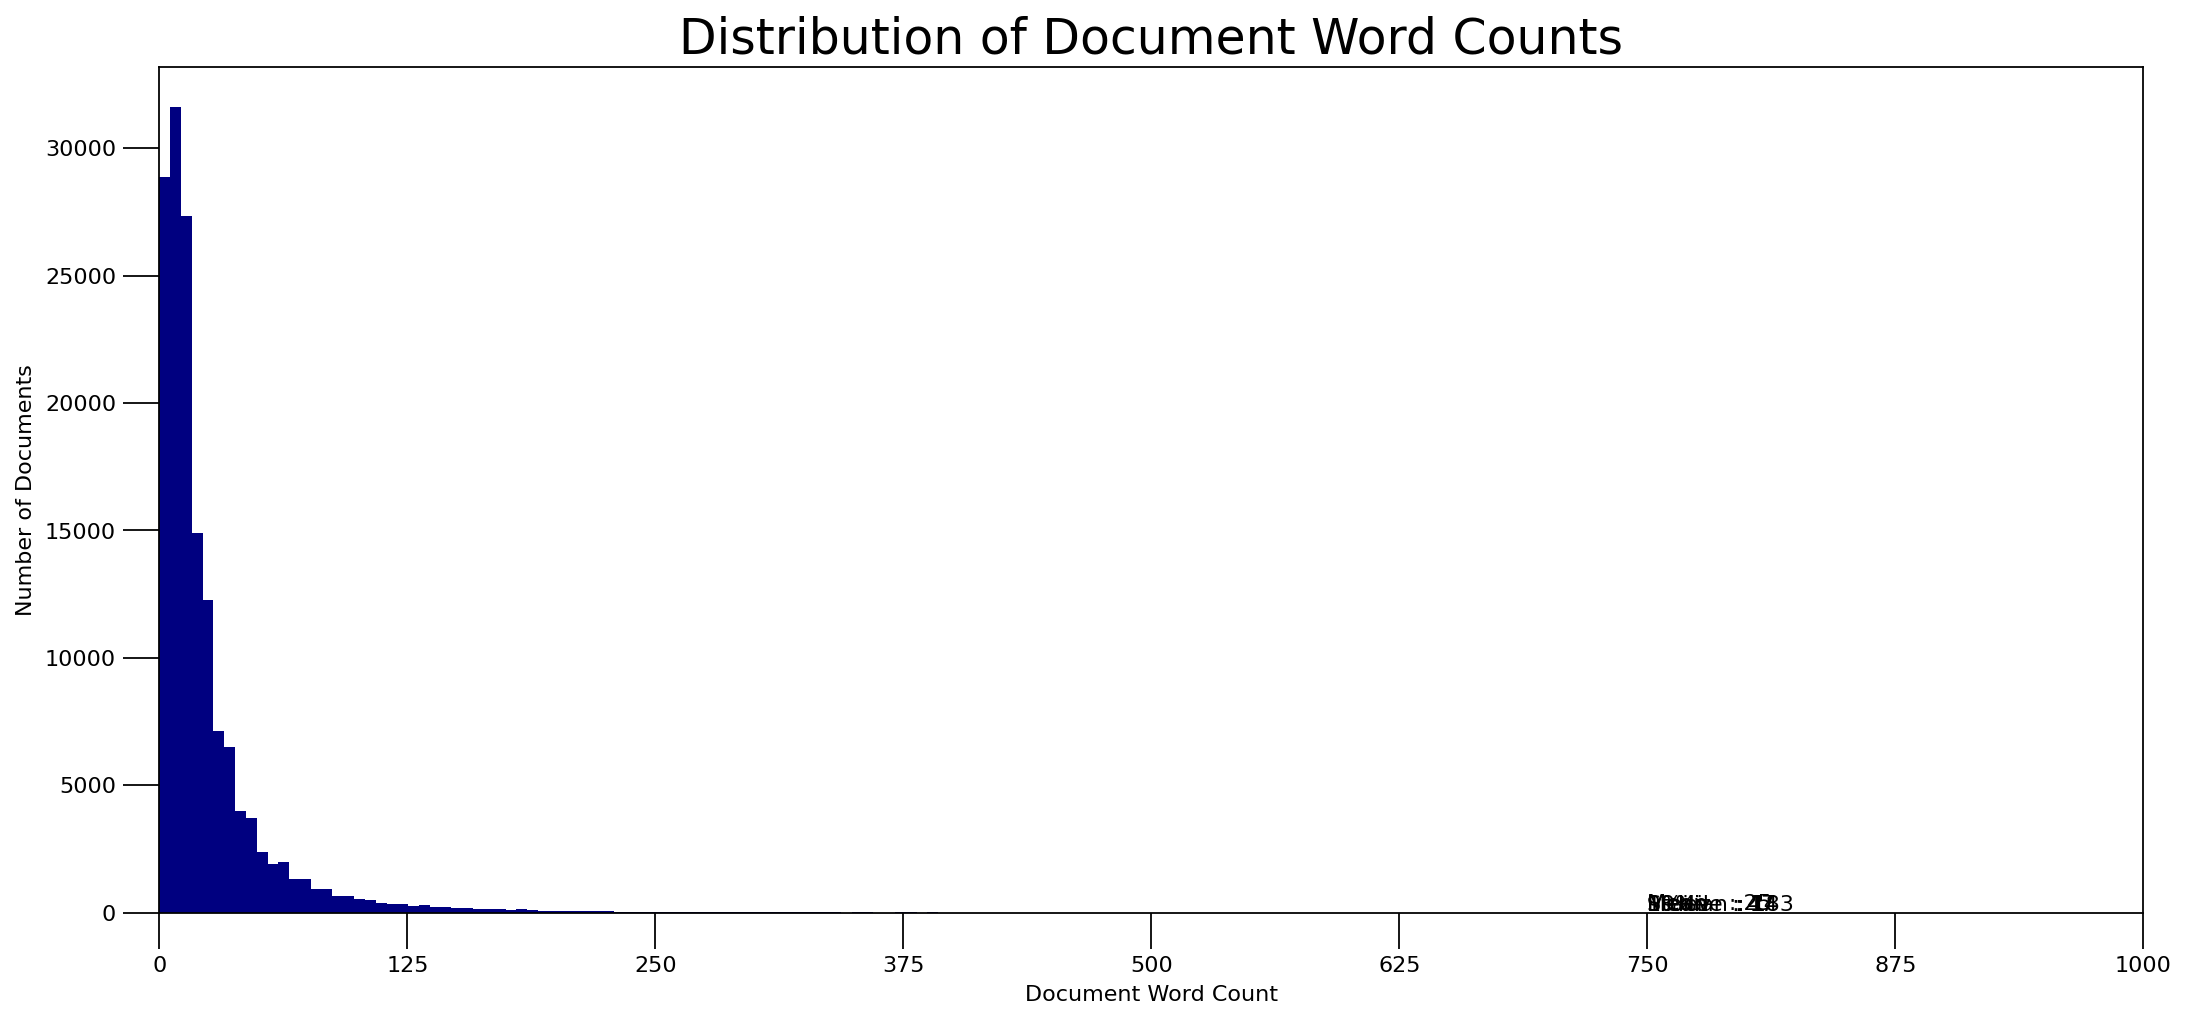

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

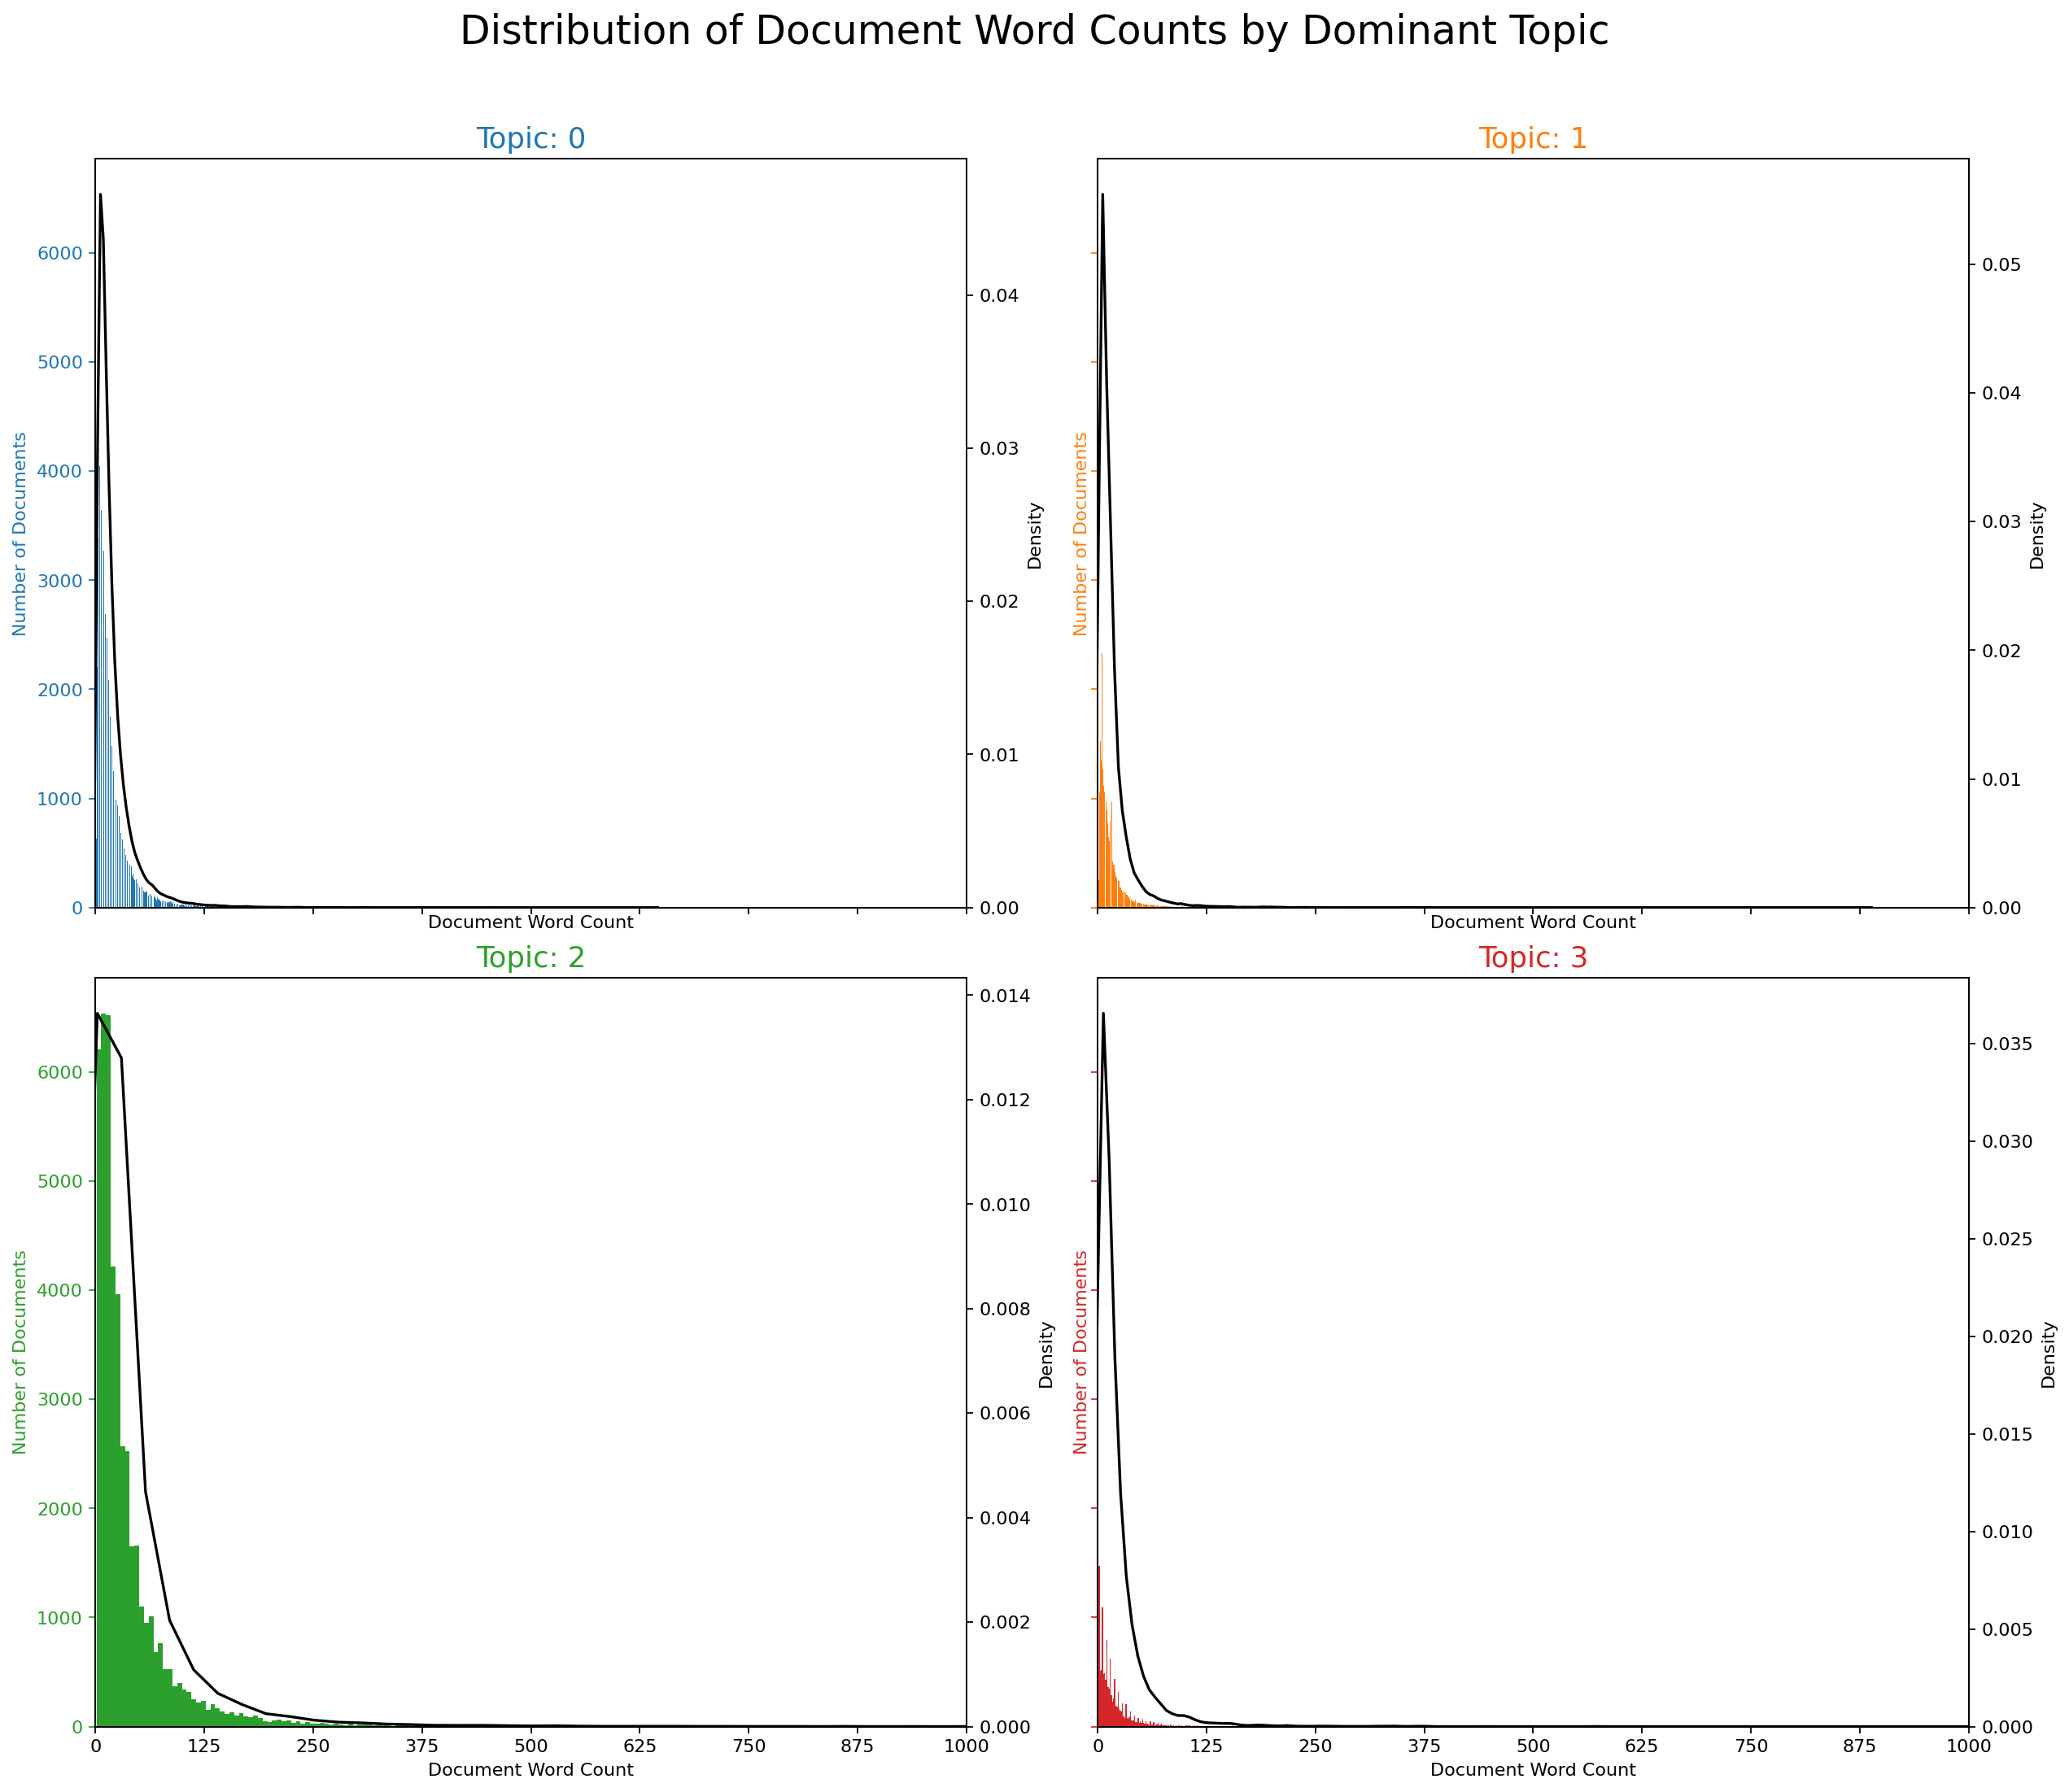

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

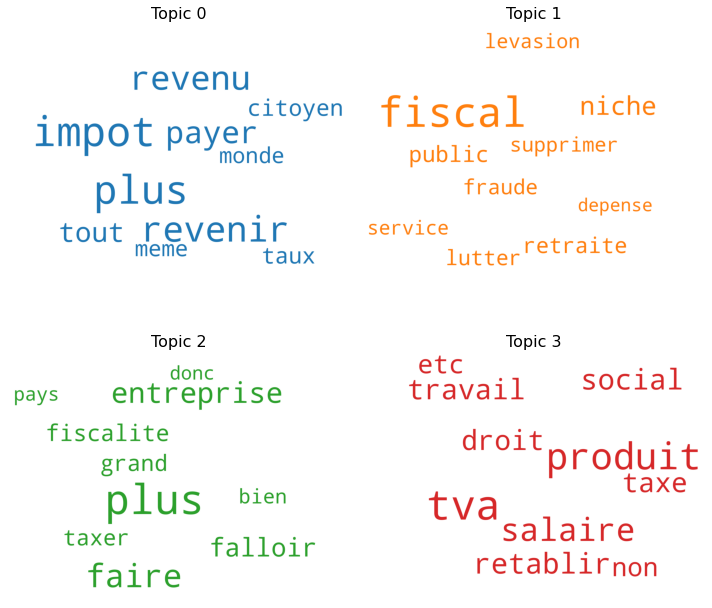

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()



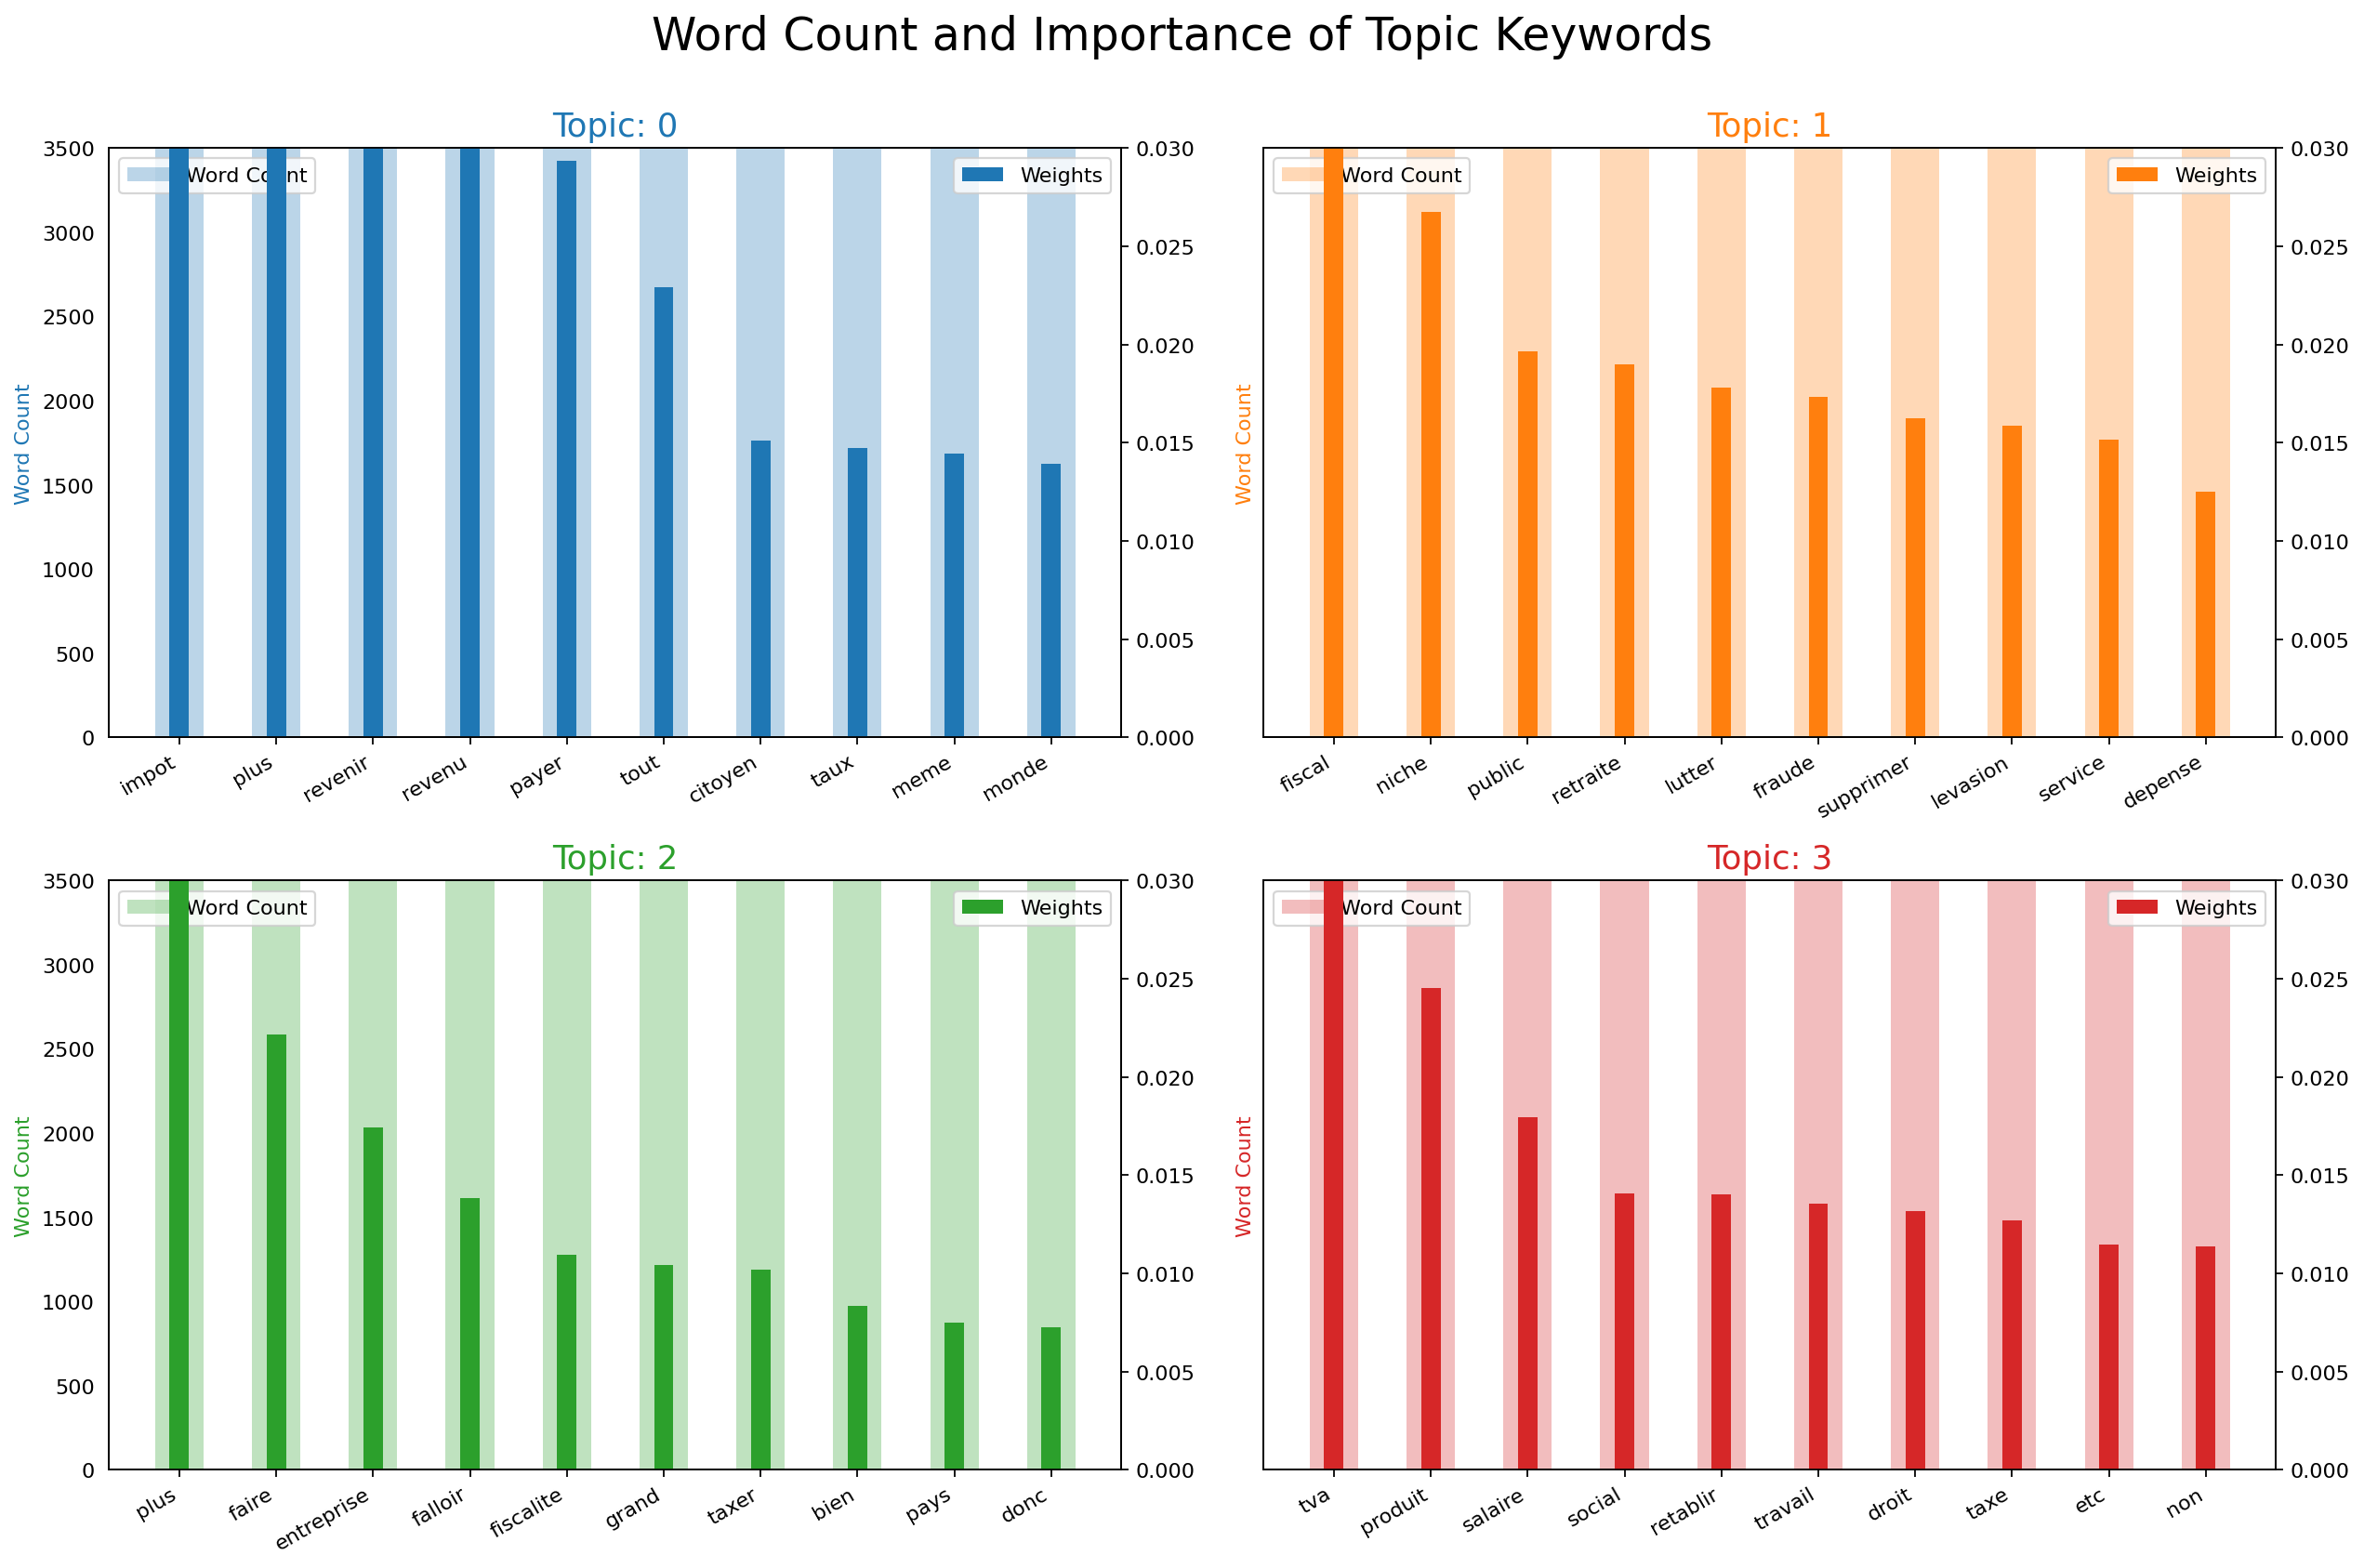

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()



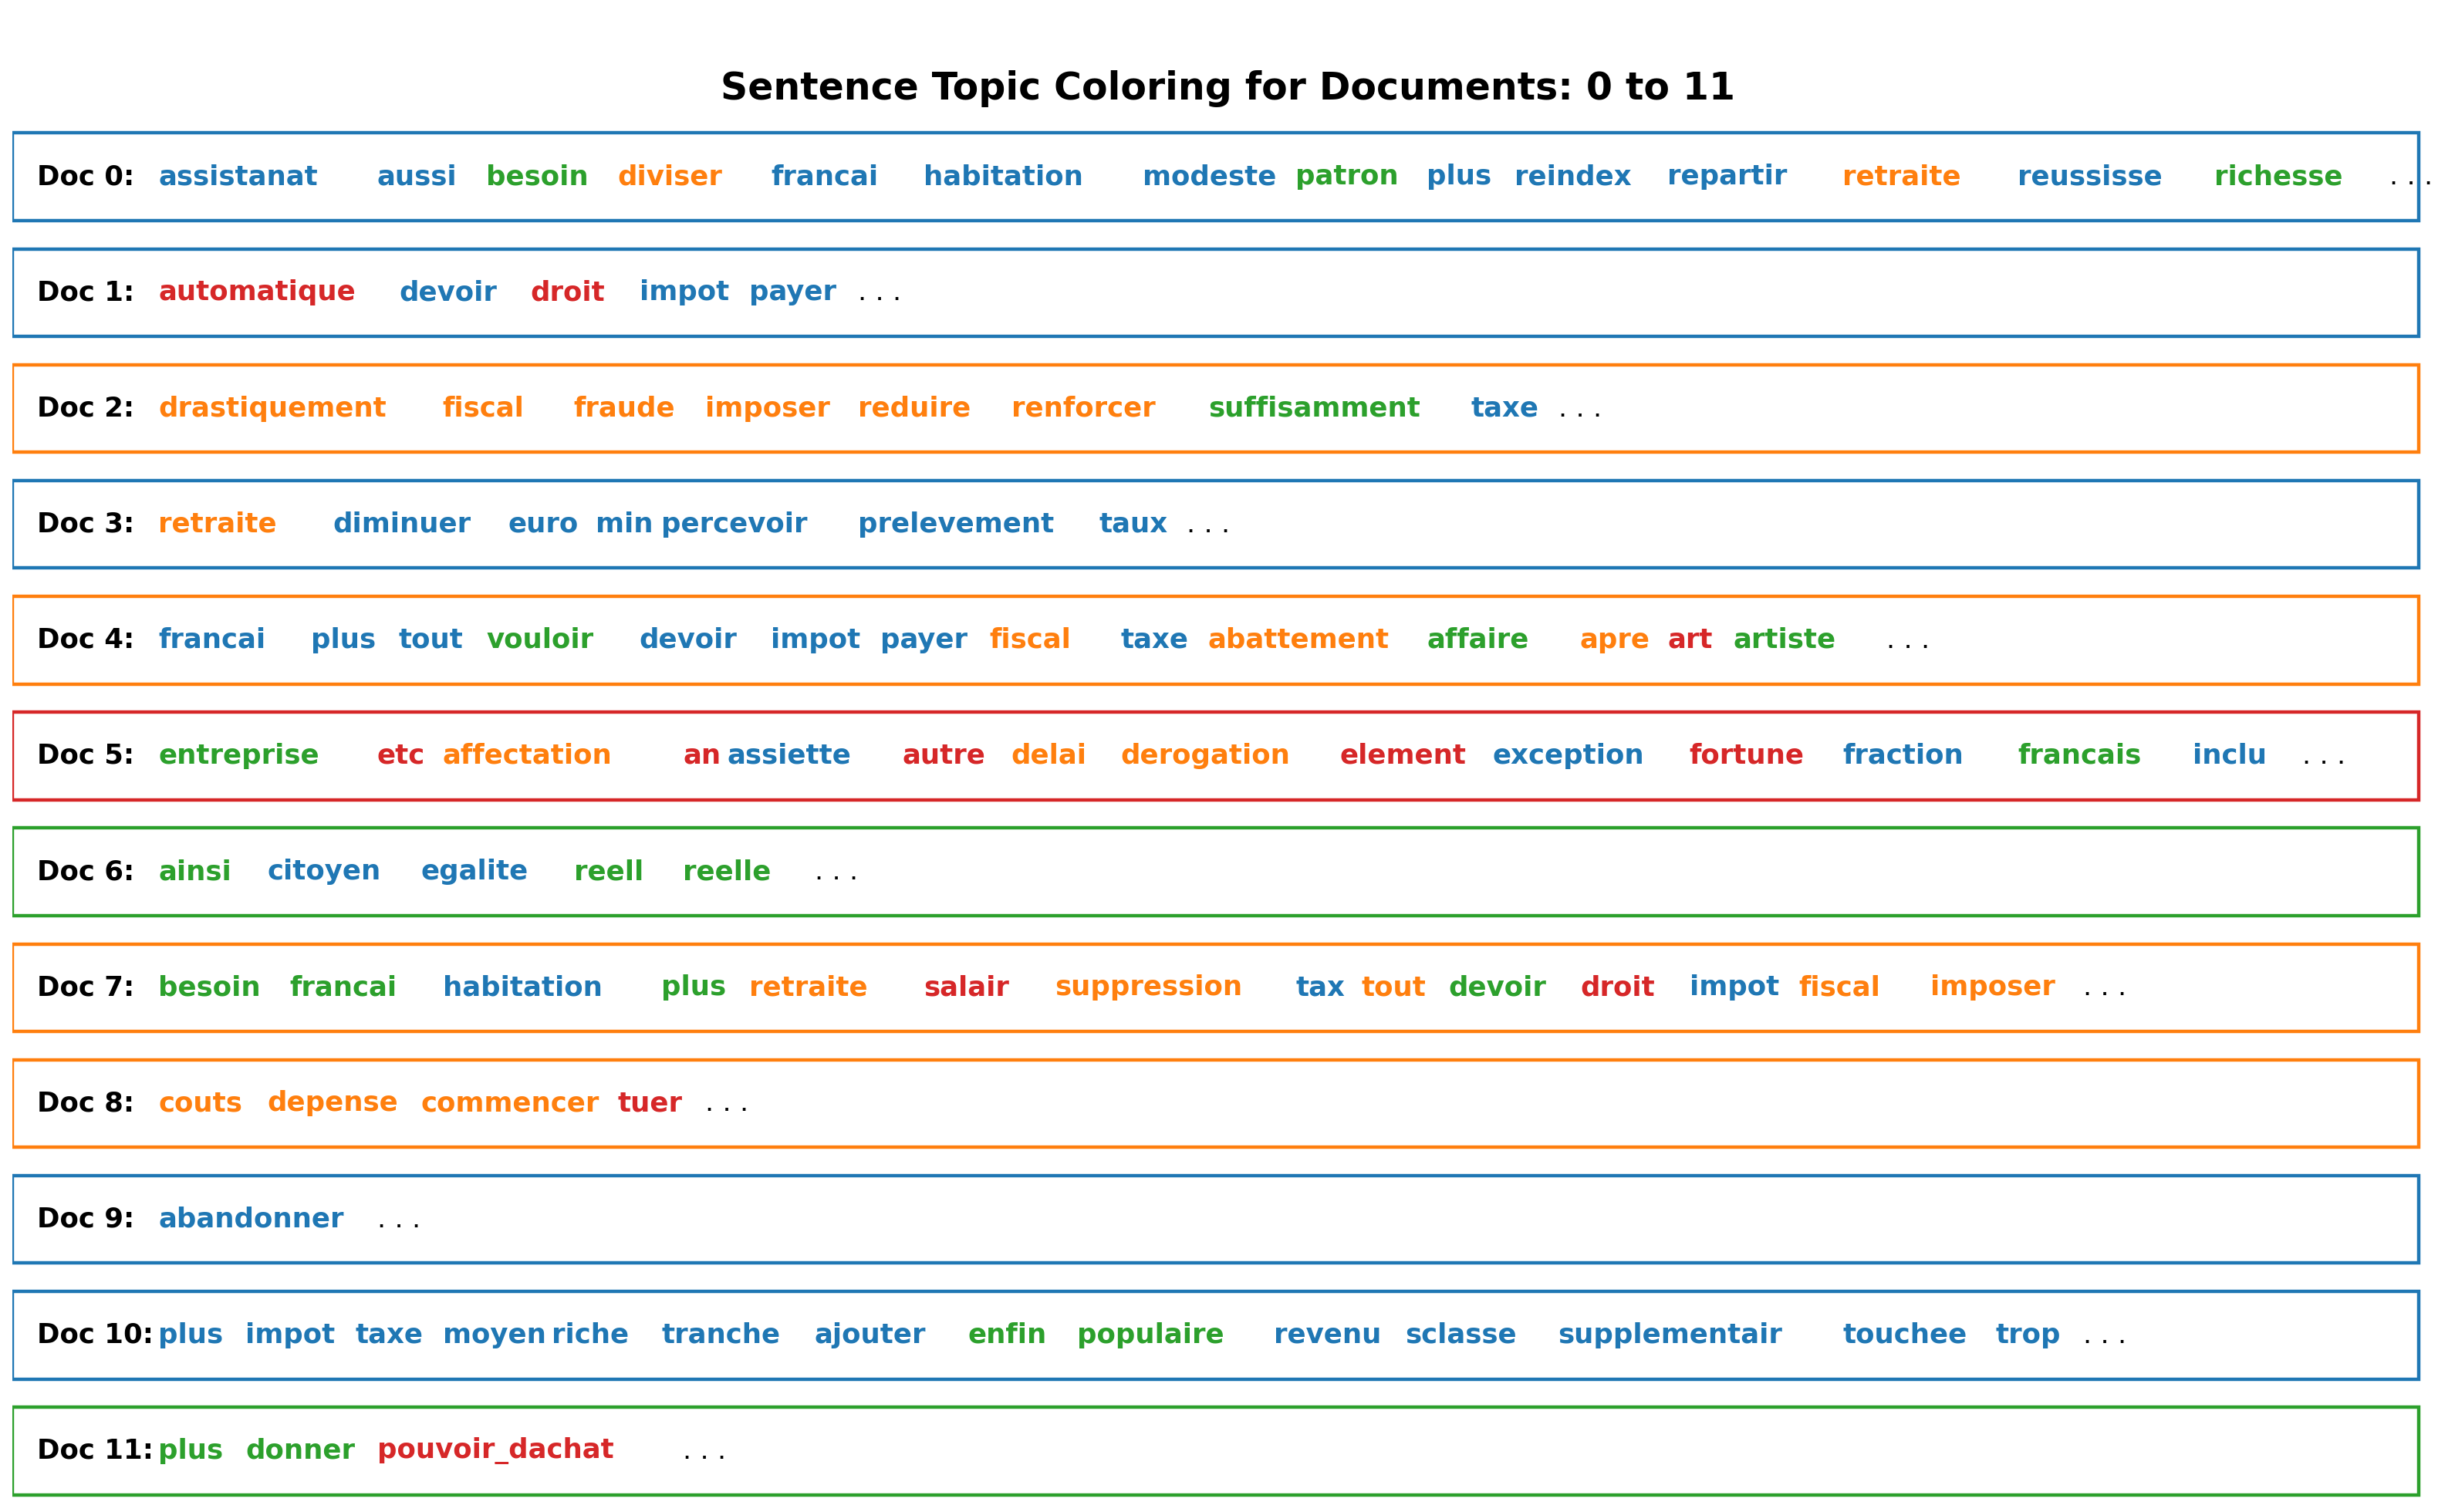

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    



In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)



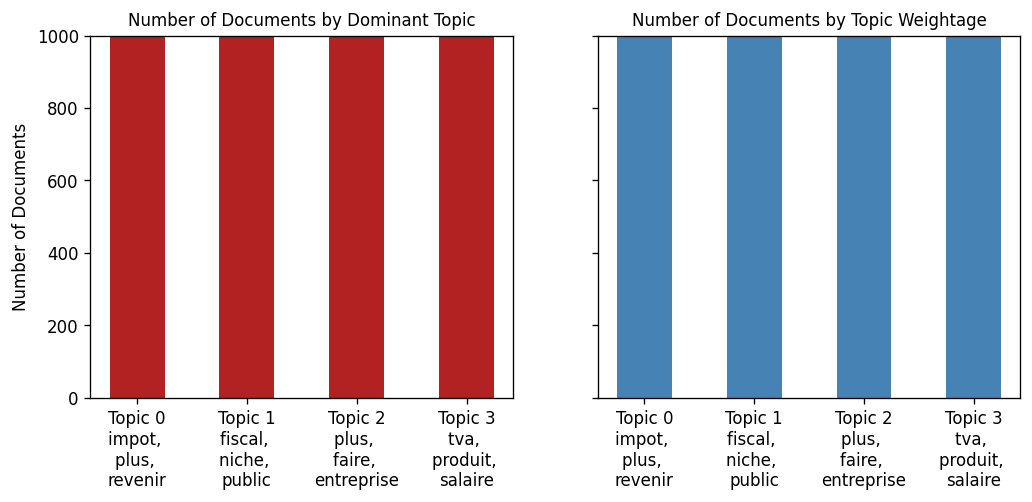

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 145620 samples in 0.118s...
[t-SNE] Computed neighbors for 145620 samples in 4.298s...
[t-SNE] Computed conditional probabilities for sample 1000 / 145620
[t-SNE] Computed conditional probabilities for sample 2000 / 145620
[t-SNE] Computed conditional probabilities for sample 3000 / 145620
[t-SNE] Computed conditional probabilities for sample 4000 / 145620
[t-SNE] Computed conditional probabilities for sample 5000 / 145620
[t-SNE] Computed conditional probabilities for sample 6000 / 145620
[t-SNE] Computed conditional probabilities for sample 7000 / 145620
[t-SNE] Computed conditional probabilities for sample 8000 / 145620
[t-SNE] Computed conditional probabilities for sample 9000 / 145620
[t-SNE] Computed conditional probabilities for sample 10000 / 145620
[t-SNE] Computed conditional probabilities for sample 11000 / 145620
[t-SNE] Computed conditional probabilities for sample 12000 / 145620
[t-SNE] Computed conditional probabi

In [ ]:
!pip install pyLDAvis

In [ ]:
## vizualization with pyLDAVIS

In [ ]:
#run ONCE
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 22.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=bb94028591368eafb216af7c1e1a89002aeb9387c9a9b62ebbcca6b53ce6e0ff
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.194310 -0.111304       1        1  34.031027
0     -0.196987 -0.094679       2        1  32.277938
1      0.347132 -0.162974       3        1  17.386099
3      0.044166  0.368957       4        1  16.304936, topic_info=         Term           Freq          Total Category  logprob  loglift
27     fiscal   73070.000000   73070.000000  Default  30.0000  30.0000
24      impot   67652.000000   67652.000000  Default  29.0000  29.0000
540   revenir   48851.000000   48851.000000  Default  28.0000  28.0000
636    revenu   43904.000000   43904.000000  Default  27.0000  27.0000
8        plus  114654.000000  114654.000000  Default  26.0000  26.0000
...       ...            ...            ...      ...      ...      ...
318   exemple    4932.178967   12585.792974   Topic4  -4.8625   0.8769
621       vie    3750.129820    8626.478744   Topic4  -5.1365   0.9807
153      bien    3958.693597   17192.765347   Topic4  -5.0823   0.3451
1077     base    3053.910466    5834.177409   Topic4  -5.3418   1.1664
126      aide    3414.851887   17235.584768   Topic4  -5.2301   0.1949

[209 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
126       2  0.801829        aide
126       4  0.198137        aide
956       4  0.999687    ailleurs
654       1  0.999830       aller
130       2  0.999922  allocation
...     ...       ...         ...
621       1  0.458936         vie
621       3  0.106301         vie
621       4  0.434708         vie
1424      1  0.999860        voir
86        4  0.999871     voiture

[226 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4])